<a href="https://colab.research.google.com/github/darisoy/EE596_Project/blob/main/testing_fasterRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as T
from PIL import Image
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
!git clone https://github.com/darisoy/EE596_Project.git

fatal: destination path 'EE596_Project' already exists and is not an empty directory.


In [123]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, min_size=1000).to(device)

In [124]:
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [125]:
trf = T.Compose([T.ToTensor()])

In [126]:
def draw_boxes(image, img, thres=0.5):
    model.eval()
    image = Image.open(image)
    input = trf(image)
    input = torch.unsqueeze(input, 0)
    input = input.to(device)
    output = model(input)

    # img = cv2.imread('/content/EE596_Project/data/furnished/'+str(i)+'.jpg')
    for idx, box in enumerate(output[0]['boxes'].tolist()):
        label = output[0]['labels'][idx].tolist()
        score = output[0]['scores'][idx].tolist()
        if score > thres:
            (x,y,w,h) = box
            x,y,w,h = int(x), int(y), int(w), int(h)
            img = cv2.rectangle(img, (x, y), (w, h), (0, 0, 255), 1)
            cv2.putText(img, COCO_INSTANCE_CATEGORY_NAMES[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,255), 1)  
    
    cv2_imshow(img)

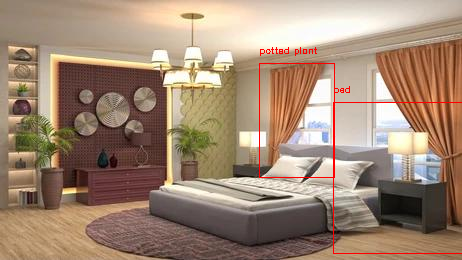

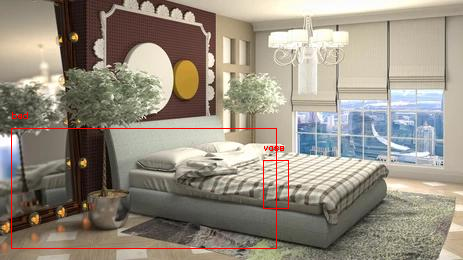

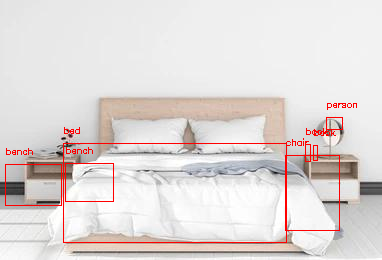

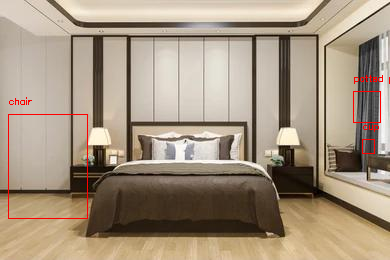

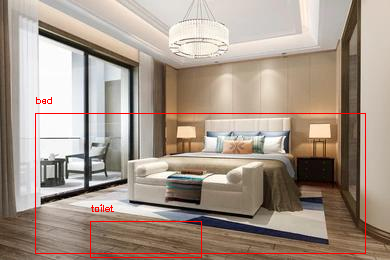

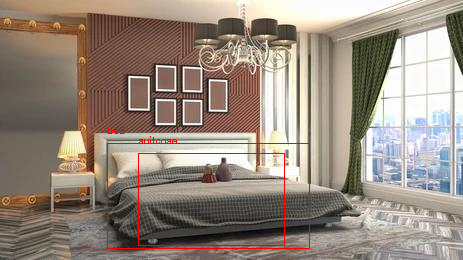

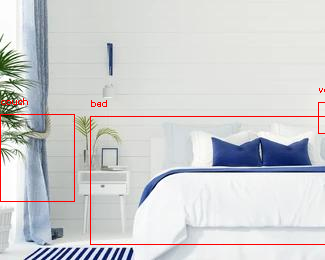

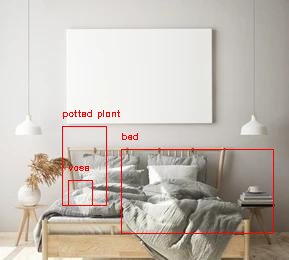

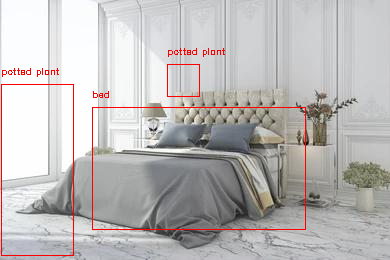

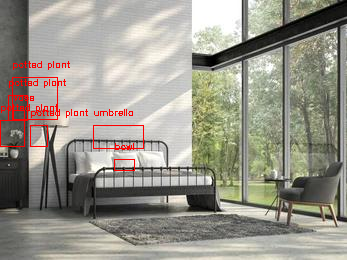

In [127]:
image = glob.glob("/content/EE596_Project/data/furnished/*jpg")
# for i in random.sample(range(0, len(images)), 20):
for i in range(0, 10):
    model.eval()
    with torch.no_grad():
        img = cv2.imread('/content/EE596_Project/data/furnished/'+str(i)+'.jpg')
        draw_boxes(images[i], img, thres=0.7)

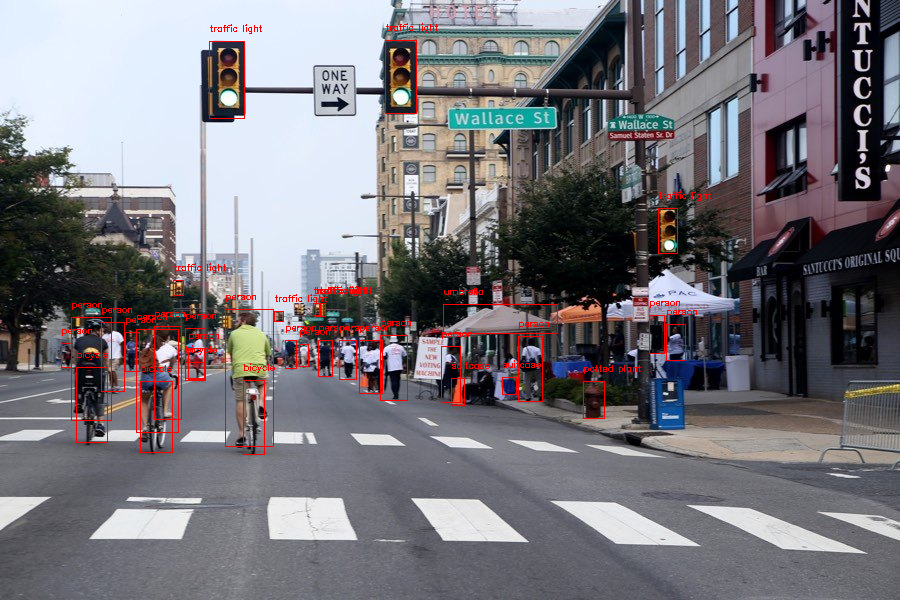

In [131]:
name = '/content/philly-free-streets-broad.jpg'
bike = glob.glob(name)
img = cv2.imread(name)
draw_boxes(bike[0], img, thres=0.6)